# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [106]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [107]:
import sklearn
sklearn.__version__

'0.23.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [109]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

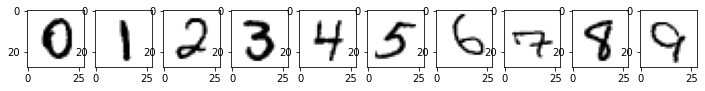

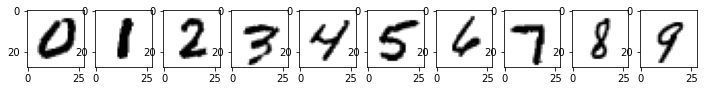

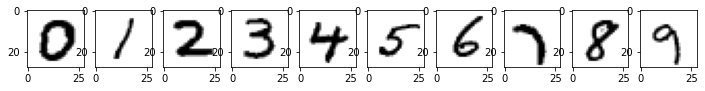

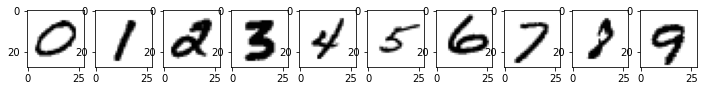

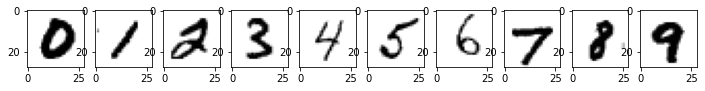

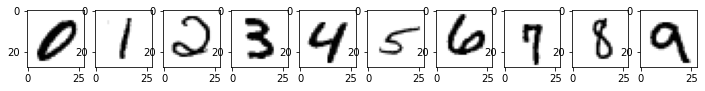

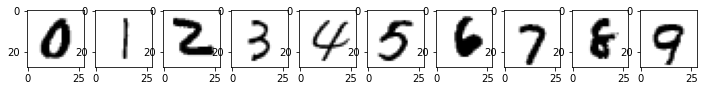

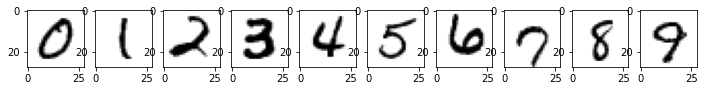

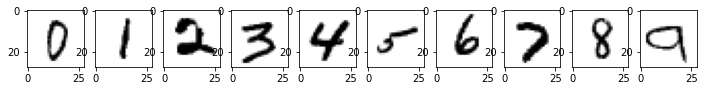

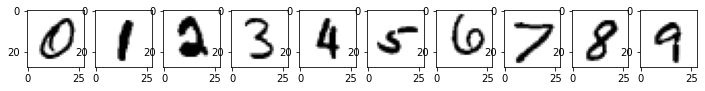

In [134]:
def P1(num_examples=10):

### STUDENT START ###


# External loop, to repeat the process a number of times equal to "num_examples"
    for j in range(num_examples):
        
# Preparing a figure for all subplots later
        fig = plt.figure()
        fig.set_figheight(12)
        fig.set_figwidth(12)
# Internal loop, goes over each example of digit, from 0 to 9 and add subplot for each digit
        for i in range(num_examples):
            im_idx = np.argwhere(Y == str(i))[j]
            plottable_image = np.reshape(X[im_idx], (28, 28))
            ax = fig.add_subplot(1, 10, i+1)
            ax.imshow(plottable_image, cmap='gray_r')
            
### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [5]:
def P2(k_values):

### STUDENT START ###

# Loop to create a new KNN classifier for each k value, defined by "k_values" argument
    for k in k_values:
        
# Define K for each KNN classifier
        clf = KNeighborsClassifier(n_neighbors=k)

# Define the training data using "mini_train_data" 
        clf.fit(mini_train_data, mini_train_labels)

# Use defined training data to make predictions on "dev_data" 
        preds = clf.predict(dev_data)

# Print Classification Report for k = 1 and accuracies for all k values
        if k == 1:
            print("Classification Report for k = 1:")
            print(classification_report(dev_labels, preds))
        print("Accuracy for k =", k, ":")
        print(classification_report(dev_labels, preds, output_dict=True)["accuracy"])
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Classification Report for k = 1:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Accuracy for k = 1 :
0.884
Accuracy for k = 3 :
0.876
Accuracy for k = 5 :
0.882
Accuracy for k = 7 :
0.877
Accuracy for k = 9 :
0.875


ANSWER:

Digit **8** is the most difficult for the 1-Nearest Neighbor model to recognize, because based on the classification report, it has the lowest f-score, which combines recall and precision metrics. Furthermore, digit 8 also has the lowest recall, only 77% of the digit 8 were recognized.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [6]:
def P3(train_sizes, accuracies):

### STUDENT START ###

# Loop to train the model with different training sizes, as defined by "train_sizes" list
    for size in train_sizes:

# Reduce the amount of train data accordingly to the defined "train_sizes"
        reduced_train_data, reduced_train_labels = X[:size], Y[:size]

# Define classification model as KNN with K=1   
        clf = KNeighborsClassifier(n_neighbors=1)

# Define the training data using "reduced_train_data" 
        clf.fit(reduced_train_data, reduced_train_labels)
        
# Start clock
        start_time = time.time()

# Use the defined training data to make predictions on "dev_data"
        preds = clf.predict(dev_data)

# End clock
        end_time = time.time()

# Calculate and print total elapsed time
        print("Elapsed time for train size =", size, ":", end_time-start_time)

# Calculate and print accuracies for each train size from Classification Report
        accuracy = classification_report(dev_labels, preds, output_dict=True)["accuracy"]
        accuracies.append(accuracy)      
        print("Accuracy for train size =", size, ":", accuracy)
        

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

Elapsed time for train size = 100 : 0.10593795776367188
Accuracy for train size = 100 : 0.702
Elapsed time for train size = 200 : 0.1969008445739746
Accuracy for train size = 200 : 0.791
Elapsed time for train size = 400 : 0.38378047943115234
Accuracy for train size = 400 : 0.811
Elapsed time for train size = 800 : 0.7515573501586914
Accuracy for train size = 800 : 0.866
Elapsed time for train size = 1600 : 1.4981575012207031
Accuracy for train size = 1600 : 0.905
Elapsed time for train size = 3200 : 2.976316213607788
Accuracy for train size = 3200 : 0.927
Elapsed time for train size = 6400 : 5.833672046661377
Accuracy for train size = 6400 : 0.939
Elapsed time for train size = 12800 : 11.593385696411133
Accuracy for train size = 12800 : 0.952
Elapsed time for train size = 25600 : 23.137812614440918
Accuracy for train size = 25600 : 0.963


### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

In [152]:
# Generate training data for the range of training size in training dataset  
train_sizes = [100,200,500,1000,2000,4000,8000,10000,20000,40000,60000]
accuracies = []
for size in train_sizes:

# Reduce the amount of train data accordingly to the defined "train_sizes"
    reduced_train_data, reduced_train_labels = X[:size], Y[:size]

# Define classification model as KNN with K=1   
    clf = KNeighborsClassifier(n_neighbors=1)

# Define the training data using "reduced_train_data" 
    clf.fit(reduced_train_data, reduced_train_labels)

# Use the defined training data to make predictions on "dev_data"
    preds = clf.predict(dev_data)

# Calculate and print accuracies for each train size from Classification Report
    accuracy = classification_report(dev_labels, preds, output_dict=True)["accuracy"]
    accuracies.append(accuracy)  

0.971


Linear regression without transformation R^2=: 0.33831726460558154
Predicted accuracy for train size = [60000] : [1.01289468]
Predicted accuracy for train size = [120000] : [1.16468481]
Predicted accuracy for train size = [1000000] : [3.39094009]


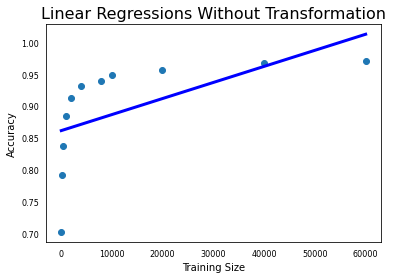

Linear regression with log transformation R^2=: 0.9893144033580447
Predicted accuracy for train size = [60000] : 0.9731625335168476
Predicted accuracy for train size = [120000] : 0.9795578733012624
Predicted accuracy for train size = [1000000] : 0.9911826211860829


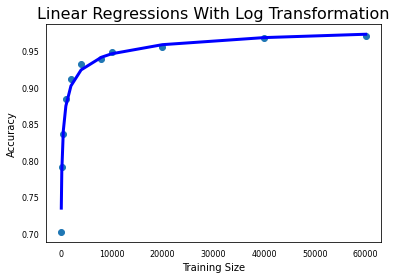

In [162]:
def P4():
    from sklearn.preprocessing import normalize

### STUDENT START ###
        
# WITHOUT TRANSFORMATION

# Convert training X and Y into proper format for linear regresion
    train_x=np.array(train_sizes).reshape((-1, 1))
    train_y=np.array(accuracies)
    
# Runs Linear Regression on training data  
    model = LinearRegression()
    model.fit(train_x, train_y)
    
# Calculate R^2 and print
    r_sq = model.score(train_x, train_y)
    print('Linear regression without transformation R^2=:', r_sq)
    
# Make predictions using linear regression without transformation for training size 60000, 120000, 1000000
    test_x = np.array([60000,120000,1000000]).reshape((-1, 1))
    for x in test_x:
        y = model.predict(x.reshape((-1, 1)))
        print("Predicted accuracy for train size =", x, ":", y)

# Make predictions for training size within the range of training set
    test_x = train_x
    pred = model.predict(test_x)
        
# Plot predicted vs actual accuracy
    plt.scatter(train_x, train_y, marker='o', linestyle='None')
    plt.plot(test_x, pred, color='blue', linewidth=3)
    
    plt.title("Linear Regressions Without Transformation", fontsize=16)
    plt.xlabel("Training Size", fontsize=10)
    plt.ylabel("Accuracy", fontsize=10)
    # Set the x, y axis tick marks text size.
    plt.tick_params(
    axis='both',          # changes apply to the both-axis
    which='both',         # both major and minor ticks are affected
    bottom=False,         # ticks along the bottom edge are off
    top=False,            # ticks along the top edge are off
    left=False,           # ticks along the left edge are off
    right=False,          # ticks along the right edge are off
    labelsize=8)

    # Display the plot
    plt.show()

# WITH TRANSFORMATION

# Convert training X and Y into proper format for linear regresion 
# tranform linear function into a log odds ratio function
    train_x=np.log(np.array(train_sizes)).reshape((-1, 1))
    train_y=np.log(np.array(accuracies)/(1-np.array(accuracies)))

# Runs Linear Regression on training data  
    model = LinearRegression()
    model.fit(train_x, train_y)
    
# Calculate R^2 and print
    r_sq = model.score(train_x, train_y)
    print('Linear regression with log transformation R^2=:', r_sq)
    
# Make predictions using linear regression with log transformation for training size 60000, 120000, 1000000 

    test_x = np.array([60000,120000,1000000]).reshape((-1, 1))
    y=[]
    for x in test_x:
        y.append(model.predict(np.log(x).reshape((-1, 1)))[0])
    max_y=max(y)    
    for x, y in zip(test_x,y):
        print("Predicted accuracy for train size =", x, ":", np.exp(y)/(1+np.exp(y)))

# Make predictions for training size within the range of training set
    test_x = train_x
    pred = model.predict(test_x)

# Plot predicted vs actual accuracy
    plt.scatter(np.exp(train_x), np.exp(train_y)/(1+np.exp(train_y)), marker='o', linestyle='None')
    plt.plot(np.exp(test_x),  np.exp(pred)/(1+np.exp(pred)), color='blue', linewidth=3)
    
    plt.title("Linear Regressions With Log Transformation", fontsize=16)
    plt.xlabel("Training Size", fontsize=10)
    plt.ylabel("Accuracy", fontsize=10)
    # Set the x, y axis tick marks text size.
    plt.tick_params(
    axis='both',          # changes apply to the both-axis
    which='both',         # both major and minor ticks are affected
    bottom=False,         # ticks along the bottom edge are off
    top=False,            # ticks along the top edge are off
    left=False,           # ticks along the left edge are off
    right=False,          # ticks along the right edge are off
    labelsize=8)
    # Display the plot
    plt.show()
    

### STUDENT END ###

P4()

ANSWER:

Train size and accuracy have a logarithmic relationship. Linear regression doesn't work here well because it assumes a linear relationship. Therefore, the model's R^2 is only 0.42, because it underestimates accuracy when training size is small, but overestimates the accuracy when training size is large. 

One way to resolve this is by taking the log of train sizes. This transformation would eat up some of the curvature making the relationship between the two variables more linear. As result, post log transformation, the model's R^2 is 0.91. Even though it still far from perfect, it gives much more reliable estimates of accuracy for each training size. 


### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


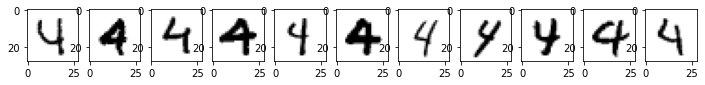

In [136]:
def P5():

### STUDENT START ###

# Preparing a figure for all subplots later
    fig = plt.figure()
    fig.set_figheight(12)
    fig.set_figwidth(12)
    
# Defines classifier, training set and use training set to make prediction on dev_data:
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(mini_train_data, mini_train_labels)
    preds = clf.predict(dev_data)

# Creates and prints Confusion Matrix
    conf = confusion_matrix(dev_labels, preds)
    print(conf)

# Per Confusion Matrix, '4' was most often misclassified as '9', 11 times on dev_data. Visualizes all 11 mistakes
    j=0
    for i in range(len(dev_labels)):
        if dev_labels[i] == '4' and preds[i] == '9':
            plottable_image = np.reshape(X[i+60000], (28, 28))
            #print(plottable_image)
            j+=1
            ax = fig.add_subplot(1, 11, j)
            ax.imshow(plottable_image, cmap='gray_r')
    
### STUDENT END ###

P5()

ANSWER:

Per Confusion Matrix, **'4'** and **'9'** are the most often confusing pair, with 4 misclassified as 9, 11 times on dev_data.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [140]:
def P6():
    
### STUDENT START ###

    def blur(matrix):
        blurred_matrix = []
        rows = 784

# Blurring process, goes for each row and column in 28x28 matrix, adding values from 8 pixels around the selected pixel
        for row in range(28):

            for col in range(28):  
                cell_num = (row * 28) + col
                weight1=1/9
                running_sum = matrix[cell_num] * weight1
                #number_of_neighbors_added = 1
                x_moves = [-29, -28, -27, -1, 1, 27, 28, 29]
                for i in range(8):

                    x_move = cell_num + x_moves[i]
                    weight2 = 1/9    
                    #to make sure you are inbounds:
                    if x_move >= 0 and x_move <= 783:
                        running_sum += matrix[x_move] * weight2
                        #number_of_neighbors_added += 1
                blurred_cell = running_sum
                blurred_matrix.append(blurred_cell)

        return blurred_matrix

    # Creating copies of training (mini-train) data and dev data:

    blurr_dev_data = dev_data.copy()
    blurr_mini_train_data = mini_train_data.copy()

    for i in range(1000):
        blurr_mini_train_data[i] = blur(blurr_mini_train_data[i])
        blurr_dev_data[i] = blur(blurr_dev_data[i])
        
    # Creating different classifiers, applying blurring to each dataset and to both
    clf0 = KNeighborsClassifier()
    clf0.fit(mini_train_data, mini_train_labels)
    preds0 = clf0.predict(dev_data)
    print("No preprocessing, accuracy:")
    print(classification_report(dev_labels, preds0, output_dict=True)['accuracy'])    
    
    clf1 = KNeighborsClassifier()
    clf1.fit(blurr_mini_train_data, mini_train_labels)
    preds1 = clf1.predict(dev_data)
    print("Preprocess training data but not dev data, accuracy:")
    print(classification_report(dev_labels, preds1, output_dict=True)['accuracy'])    

    clf2 = KNeighborsClassifier()
    clf2.fit(mini_train_data, mini_train_labels)
    preds2 = clf2.predict(blurr_dev_data)
    print("Preprocess dev data but not training data, accuracy:")
    print(classification_report(dev_labels, preds2, output_dict=True)['accuracy'])
    
    clf3 = KNeighborsClassifier()
    clf3.fit(blurr_mini_train_data, mini_train_labels)
    preds3 = clf3.predict(blurr_dev_data)
    print("Preprocess both training and dev data, accuracy:")
    print(classification_report(dev_labels, preds3, output_dict=True)['accuracy'])
    
### STUDENT END ###

P6()

No preprocessing, accuracy:
0.882
Preprocess training data but not dev data, accuracy:
0.907
Preprocess dev data but not training data, accuracy:
0.872
Preprocess both training and dev data, accuracy:
0.91


ANSWER: 

Blurring the datasets using **equal weight** substantially improved the model. The benefit is strongest when the blurring is done on both the training and dev dataset. 

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [145]:
def P7():

### STUDENT START ###

# Creating and fitting a Bernoulli NB classifier. Used 'binarize' to map pixel values to 0 or 1
    clf1 = BernoulliNB(binarize=0.1)
    clf1.fit(mini_train_data, mini_train_labels)
    pred1 = clf1.predict(dev_data)
    print("Classification Report for BernoulliNB:")
    print(classification_report(dev_labels, pred1))

# Mapping pixel values to either 0, 1 or 2 representing white, grey and black
    mapped_pixel_values = []
    for i in range(1000):
        matrix = X[i]
        mapped_matrix = []
        for j in range(len(matrix)):
            pixel = matrix[j]
            if pixel > 0 and pixel < 0.1:
                pixel=0
            elif pixel >=0.1 and pixel < 0.9:
                pixel = 1
            elif pixel >= 0.9:
                pixel = 2
            mapped_matrix.append(pixel)
        mapped_pixel_values.append(mapped_matrix)

#Creating and fitting a Multinomial NB classifier
    clf2 = MultinomialNB()
    clf2.fit(mapped_pixel_values, mini_train_labels)
    pred2 = clf2.predict(dev_data)
    print("Classification Report for MultinomialNB:")
    print(classification_report(dev_labels, pred2))
    
### STUDENT END ###

P7()

Classification Report for BernoulliNB:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       106
           1       0.88      0.95      0.91       118
           2       0.81      0.72      0.76       106
           3       0.74      0.76      0.75        97
           4       0.76      0.85      0.80        92
           5       0.83      0.68      0.75        88
           6       0.87      0.88      0.88       102
           7       0.88      0.86      0.87       102
           8       0.65      0.72      0.68        94
           9       0.78      0.77      0.77        95

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.82      0.81      0.81      1000

Classification Report for MultinomialNB:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       106
           1       0.87      0.87      0.87       11

ANSWER:

The multi-class version did not improve the accuracy, because when mapping pixels that are not completely black or completely white as 'grey' only introduced more noise (variance) to the dataset, which overfitted the model. As result the precision score dropped significantly, meaning the model is flagging a lot of false positives due to the noise in the data. Therefore, complexity is not always better.  

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [120]:
def P8(alphas):

### STUDENT START ###

# Selects BernoulliNB as the algorithm, does GridSearchCV on different alphas listed in 'alphas' dictionary, 
# Fits the model and prints best estimator and classification report
    bernoulli = BernoulliNB(binarize=0)
    clf = GridSearchCV(bernoulli, alphas, cv=5)
    clf.fit(mini_train_data, mini_train_labels)
    print(clf.best_estimator_)
    pred = clf.predict(dev_data)
    print("Accuracy for best value of alpha:")
    print(classification_report(dev_labels, pred, output_dict=True)["accuracy"])
    
    
# Checking accuracy for alpha=0
    clf2 = BernoulliNB(binarize=0, alpha=0.0)
    clf2.fit(mini_train_data, mini_train_labels)
    pred2 = clf2.predict(dev_data)
    print("Accuracy for alpha = 0.0, binarize=0")
    print(classification_report(dev_labels, pred2, output_dict=True)["accuracy"])
    
    return clf

### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

BernoulliNB(alpha=0.001, binarize=0)
Accuracy for best value of alpha:
0.823
Accuracy for alpha = 0.0, binarize=0
0.816

Best alpha =  {'alpha': 0.001}


C:\Users\George\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


ANSWER:

The best value for alpha = 0.001 with accuracy of 0.823. When alpha = 0, the accuracy is 0.816. This is expected because it means that laplace smoothing helps with generalization. 

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [132]:
def P9():

### STUDENT START ###
    #Fit the model without tuning the parameter
    clf = GaussianNB()
    clf.fit(mini_train_data, mini_train_labels)
    pred = clf.predict(dev_data)
    print("Before tuning the model parameter, the model accuracy is:")
    print(classification_report(dev_labels, pred, output_dict=True)['accuracy'])
    
    #Tuning the model parameter with GridSearchCV
    nb_classifier = GaussianNB()
    
    params_NB = {'var_smoothing': np.logspace(0,-9, num=20)}
    
    gs_NB = GridSearchCV(estimator=nb_classifier, 
                         param_grid=params_NB, 
                         cv=5,   # use any cross validation technique 
                         verbose=1, 
                         scoring='accuracy'
                        ) 
    gs_NB.fit(mini_train_data, mini_train_labels)

    #Fit the model with the tuned parameter
    clf = GaussianNB(var_smoothing=gs_NB.best_params_['var_smoothing'])
    clf.fit(mini_train_data, mini_train_labels)
    pred = clf.predict(dev_data)
    print("After tuning the var_smoothing, the model accuracy improves to:")
    print(classification_report(dev_labels, pred, output_dict=True)['accuracy'])
    #print(clf.theta_)
    #print(clf.sigma_)

### STUDENT END ###

P9()

Before tuning the model parameter, the accuracy is:
0.593
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


After tuning the var_smoothing, the accuracy improves to:
0.814


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished


ANSWER:

Gaussian distribution has two attributes theta and sigma, by tuning these parameters we can adjust the conditional probabilities of each pixel value to the optimal value. Using Gridsearch I was able to tune the sigma of Gaussian distribution to make the model more generalizable.  

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

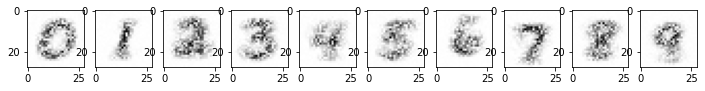

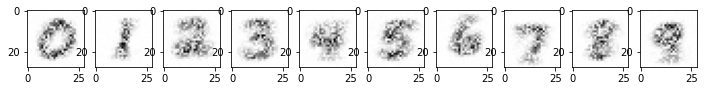

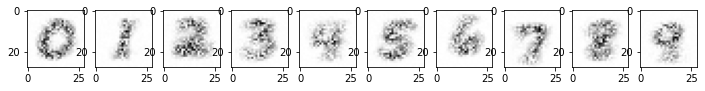

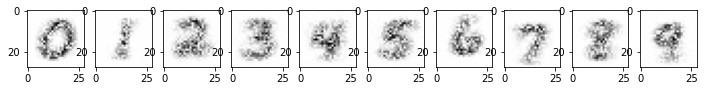

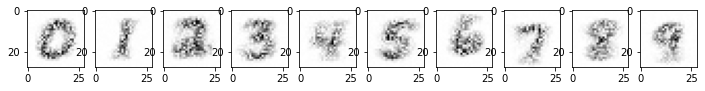

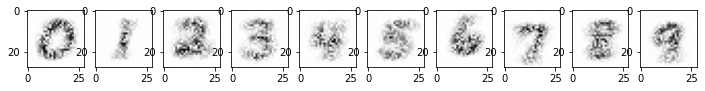

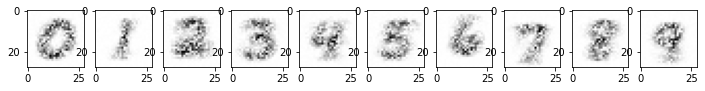

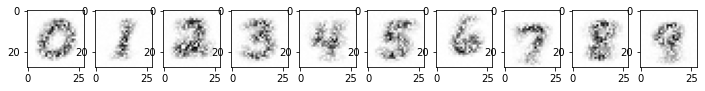

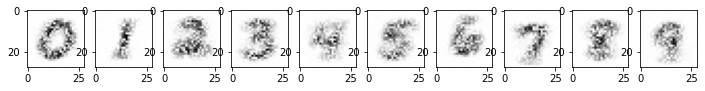

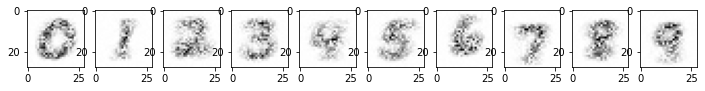

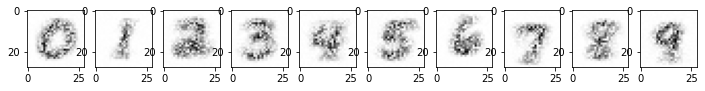

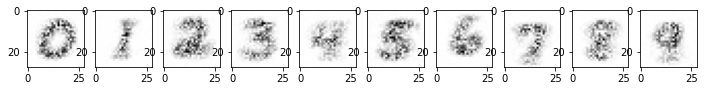

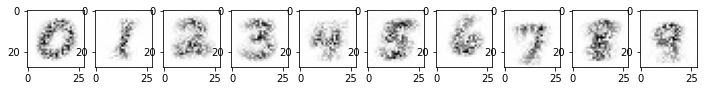

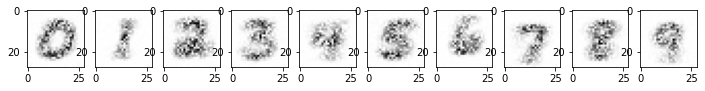

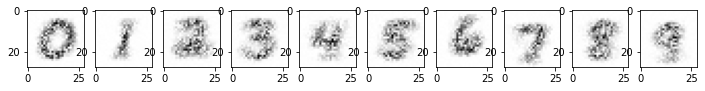

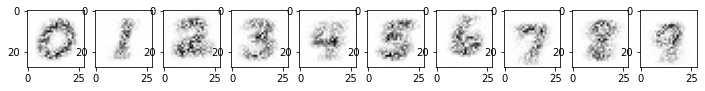

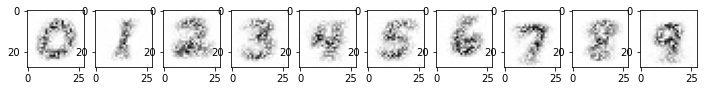

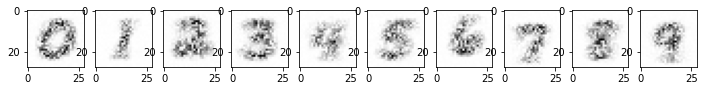

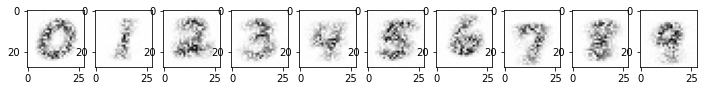

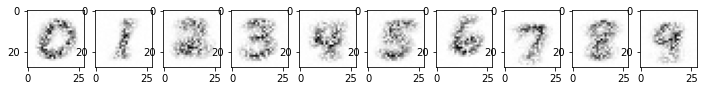

In [135]:
def P10(num_examples):

### STUDENT START ###

# Creates the model, along with the estimated log probability of each pixel, then converting it back to probability
    clf = BernoulliNB(binarize=0.3)
    clf.fit(mini_train_data, mini_train_labels)
    pred = clf.predict(dev_data)
    prob_map = np.exp(clf.feature_log_prob_)

# First loop goes over the number of times defined by "num_examples" parameter    
    for x in range(num_examples):
        fig = plt.figure()
        fig.set_figheight(12)
        fig.set_figwidth(12)

# Second loop goes over each X data point, and generates random number that will be multiplied to each pixel
        for i in range(len(prob_map)):
            pixel_map = []
            random_num = np.random.rand(28,28)

# Third loop goes over each pixel, checking its location and appending to pixel map
            for j in range(784):

                prob = prob_map[i][j] * random_num[j//28][j%28]
                pixel_map.append(prob)

# Plots each list of 10 digits (0 to 9)
            plottable_image = np.reshape(pixel_map, (28, 28))
            ax = fig.add_subplot(1, 10, i+1)
            ax.imshow(plottable_image, cmap='gray_r')     

### STUDENT END ###

P10(20)

ANSWER:

Generated digits are blurred versions of the training dataset, because in Bernoulli pixels were only classified as 0 or 1, thus losing some information of the pixel data on training dataset and creating this blurr effect.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [124]:
def P11(buckets, correct, total):
    
### STUDENT START ###

# Creates model
    clf1 = BernoulliNB(alpha=0.001, binarize=0.0)
    clf1.fit(mini_train_data, mini_train_labels)
    pred1 = clf1.predict(dev_data)

# Captures all probabilities predicted by the model
    all_probabilities = clf1.predict_proba(dev_data)
    
# External loop goes over each bucket for comparison
    for i in range(len(buckets)):
        num_correct = 0
        num_total = 0

# Internal loop goes over each set of probabilities generated by model prediction
        for j in range(len(all_probabilities)):
            probabilities = all_probabilities[j]

# Identify the largest probability in each prediction
            pred_label = np.argmax(probabilities)
    
# Based on the largest probability, identifies the respective label, which is equivalent to the digit identified
            max_prob = probabilities[pred_label]
    
# If identified digit's probability is lower than bucket, adds 1 to total
            if max_prob <= buckets[i]:
                num_total += 1
            
# If predicted label is the same of actual label, adds 1 to correct prediction counter
                if pred_label == int(dev_labels[j]):
                    num_correct += 1
        correct[i] = num_correct
        total[i] = num_total
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  31    accuracy = 0.355
p(pred) is 0.9000000000000 to 0.9990000000000    total =  98    accuracy = 0.408
p(pred) is 0.9990000000000 to 0.9999900000000    total = 157    accuracy = 0.427
p(pred) is 0.9999900000000 to 0.9999999000000    total = 203    accuracy = 0.478
p(pred) is 0.9999999000000 to 0.9999999990000    total = 265    accuracy = 0.547
p(pred) is 0.9999999990000 to 0.9999999999900    total = 298    accuracy = 0.574
p(pred) is 0.9999999999900 to 0.9999999999999    total = 341    accuracy = 0.601
p(pred) is 0.9999999999999 to 1.0000000000000    total = 1000    accuracy = 0.823


ANSWER:

Given the predicted probability is much higher than the actual probability, as expected, the NB model is overconfident. I would classify this as a weakly calibrated model. However, this we can still use this probability to rank order classifications. For example, here we see if the predicted probability is greater than 0.9999999999, its prediction is reasonably accurate. 

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [0]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()